# Learning goals
After this week's lesson you should be able to:
- Create line, scatter, and histogram plots in matplotlib
- Use seaborn to create plots


This week's lessons are adapted from:
- [The Python Data Science Handbook - Jupyter Notebook version](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.08-More-IPython-Resources.ipynb)



In [1]:
# We are going to start importing the libraries we need
# all in one cell. 
# It is a good practice to keep all the imports in one cell so that
# we can easily see what libraries we are using in the notebook.
import pandas as pd
import numpy as np
import geopandas as gpd


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# we use the inline backend to generate the plots within the browser


c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## 0. Read in the data
- In this exercise, we are going to compare race and income from the 2016 - 2020 American Community Survey. Because this survey is taken over a five year window, we are going to say that it is representative of the median year - 2018. 
- I've created a `GeoJSON` called `acs_race_income_2018.geojson` from the [NHGIS](data2.nhgis.org) data portal. 
- You can also download it [here](https://www.dropbox.com/s/2rauwpx0nb5knpb/acs_race_income_2018.geojson?dl=0). 

In [2]:
nyc_census = gpd.read_file('acs_race_income_2018.geojson')

In [3]:
nyc_census.head()

,GISJOIN,total_pop,total_pop_hispanic,total_pop_white,total_pop_black,total_pop_native,total_pop_asian,total_pop_pacific,total_pop_other,median_hh_income,COUNTY,geometry
0,G36000500001001,3772,1259,260,2172,6,59,0,1275,NaN,Bronx County,"POLYGON ((-8225044.737 4982597.653, -8224711.8..."
1,G36000500002001,1330,950,31,272,3,22,0,1002,NaN,Bronx County,"POLYGON ((-8221803.782 4984851.456, -8221858.6..."
2,G36000500002002,2057,1330,59,496,12,86,0,1404,74050.0,Bronx County,"POLYGON ((-8221803.782 4984851.456, -8221740.9..."
3,G36000500002003,1392,893,62,243,5,94,0,988,68333.0,Bronx County,"POLYGON ((-8221569.788 4984446.395, -8221551.7..."
4,G36000500004001,1047,761,28,142,2,52,2,821,NaN,Bronx County,"POLYGON ((-8221569.788 4984446.395, -8221627.1..."


In [4]:
nyc_census['perc_black'] = nyc_census['total_pop_black'] / nyc_census['total_pop']
nyc_census['perc_white'] = nyc_census['total_pop_white'] / nyc_census['total_pop']
nyc_census['perc_asian'] = nyc_census['total_pop_asian'] / nyc_census['total_pop']
nyc_census['perc_hispanic'] = nyc_census['total_pop_hispanic'] / nyc_census['total_pop']
nyc_census['perc_native'] = nyc_census['total_pop_native'] / nyc_census['total_pop']
nyc_census['perc_pacfic'] = nyc_census['total_pop_pacific'] / nyc_census['total_pop']
nyc_census['perc_other'] = nyc_census['total_pop_other'] / nyc_census['total_pop']

In [5]:
nyc_census.columns

Index(['GISJOIN', 'total_pop', 'total_pop_hispanic', 'total_pop_white',
       'total_pop_black', 'total_pop_native', 'total_pop_asian',
       'total_pop_pacific', 'total_pop_other', 'median_hh_income', 'COUNTY',
       'geometry', 'perc_black', 'perc_white', 'perc_asian', 'perc_hispanic',
       'perc_native', 'perc_pacfic', 'perc_other'],
      dtype='object')

## 1. Simple Line Plots
Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.


For all Matplotlib plots, we start by creating a figure and an axes.

In their simplest form, a figure and axes can be created as follows:

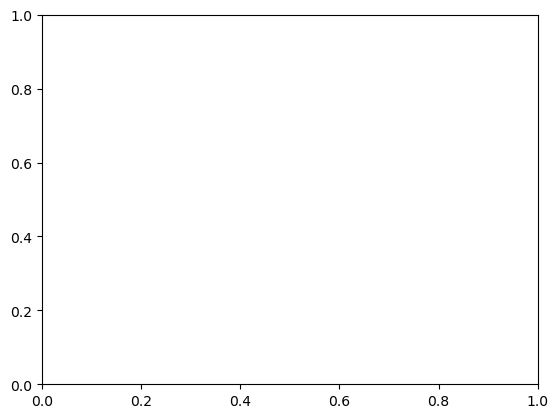

In [6]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

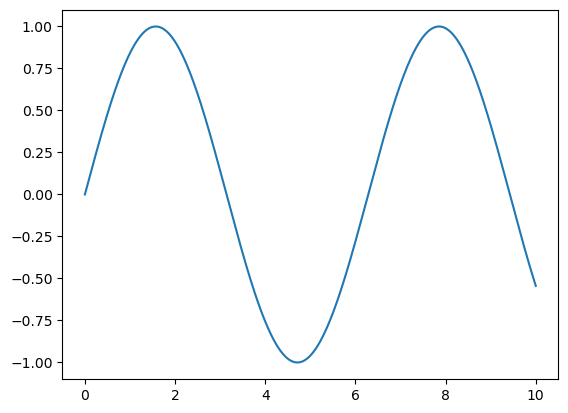

In [8]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

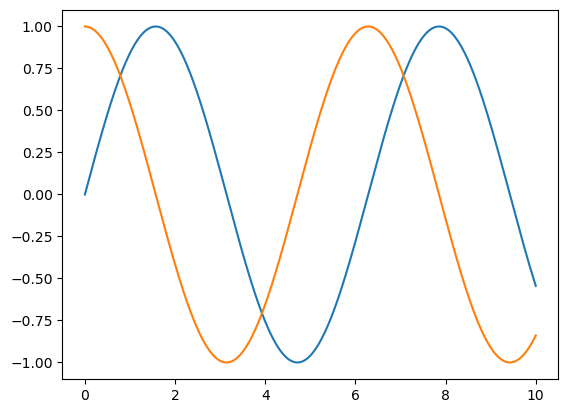

In [9]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

## 1.1 Adjusting the Plot: Line Colors and Styles
The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

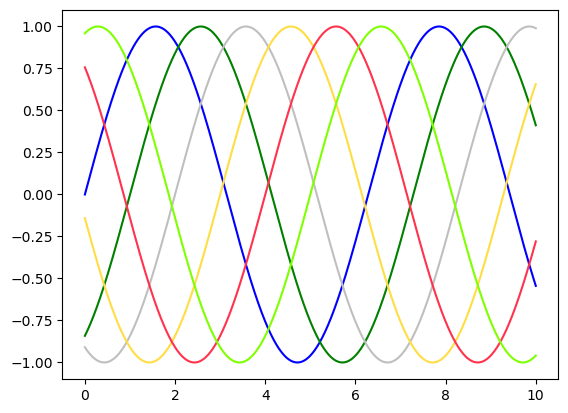

In [10]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

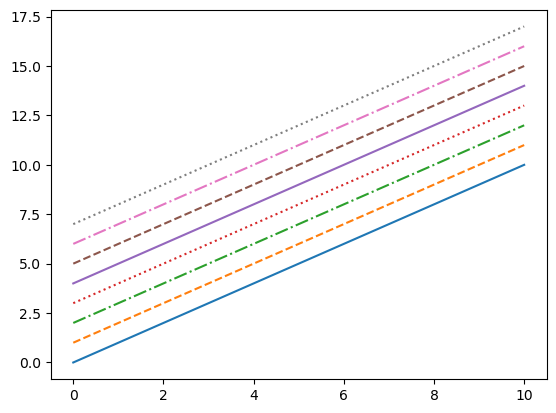

In [11]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

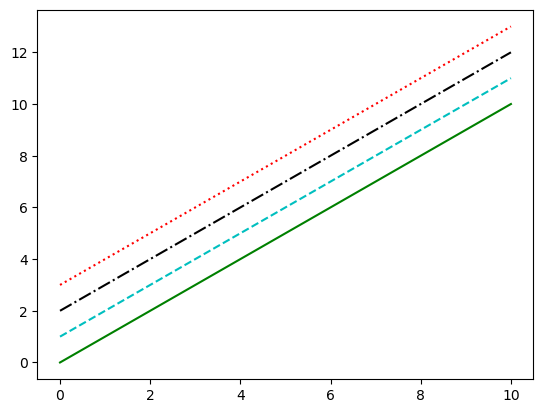

In [12]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

## 1.2 Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

(-1.5, 1.5)

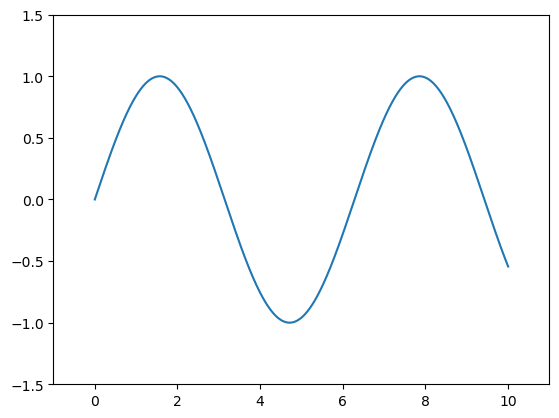

In [13]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

(1.2, -1.2)

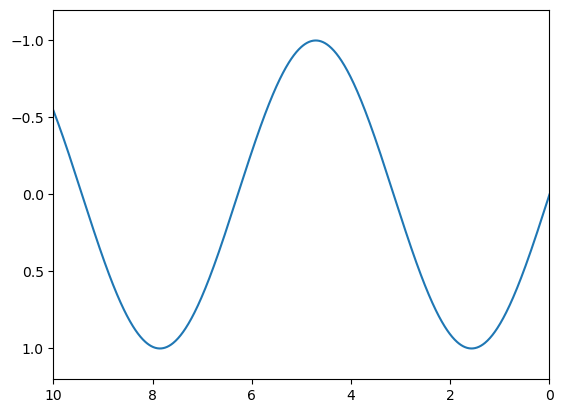

In [15]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

(-1.0, 11.0, -1.5, 1.5)

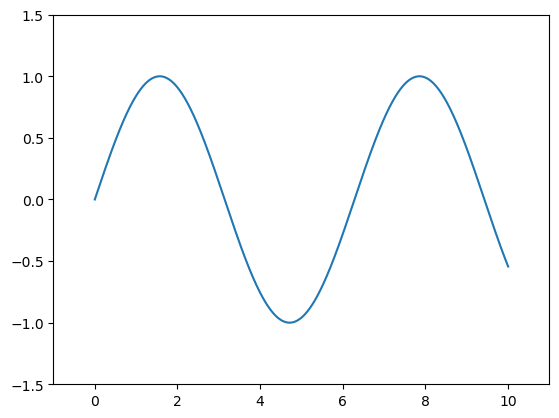

In [16]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

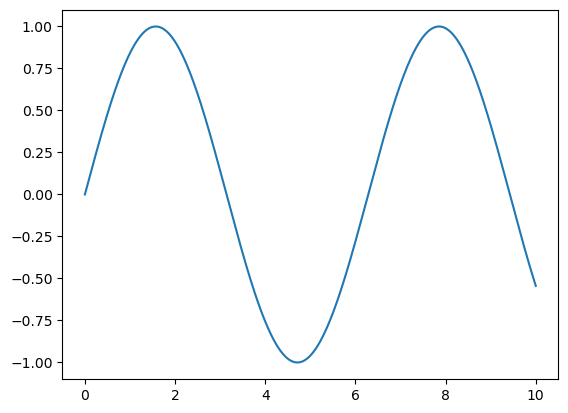

In [17]:
plt.plot(x, np.sin(x))
plt.axis('tight')

## 1.3 Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

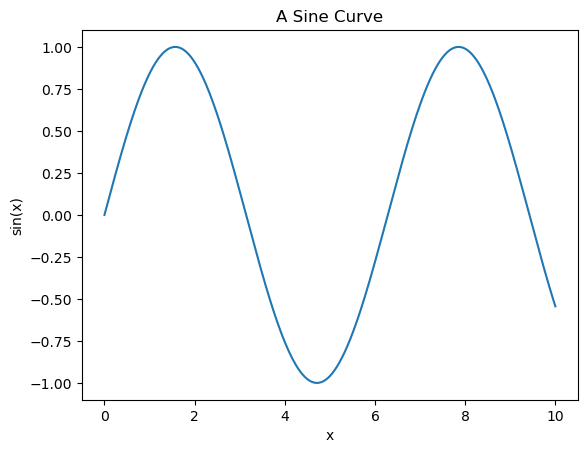

In [18]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

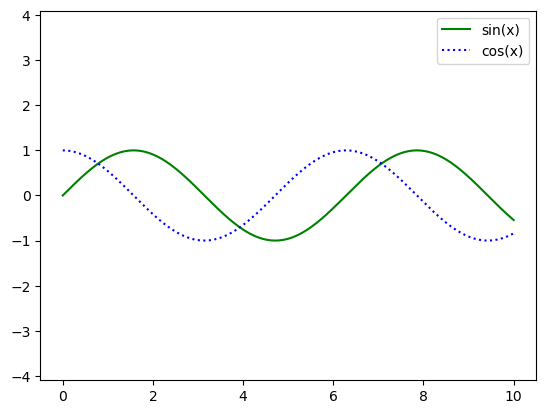

In [19]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

Text(0, 0.5, 'sin(x)')

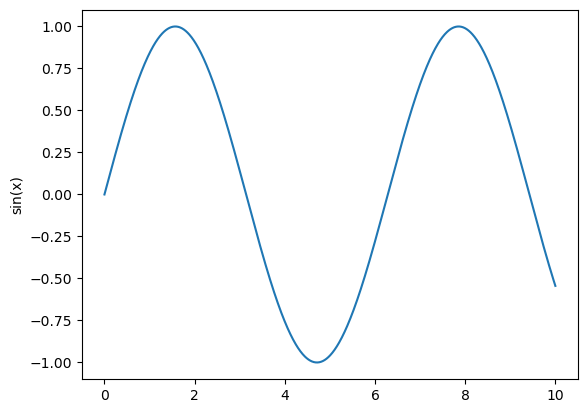

In [20]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set_ylabel('sin(x)')
# ax.set(xlim=(0, 10), ylim=(-2, 2),
#        xlabel='x', ylabel='sin(x)',
#        title='A Simple Plot')

# 2. Simple Scatter Plots
Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

## 2.1 Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

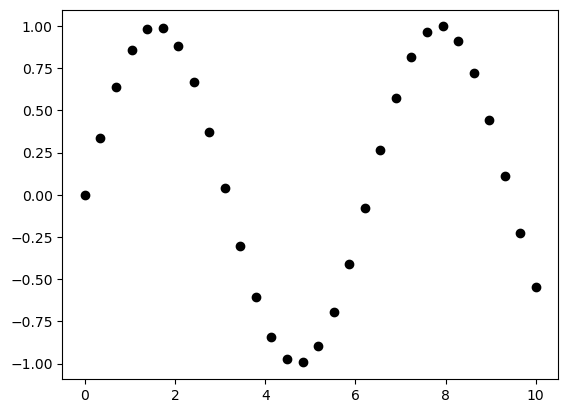

In [21]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

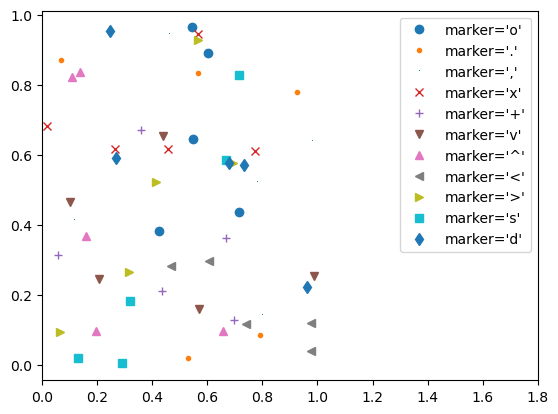

In [22]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

(-1.2, 1.2)

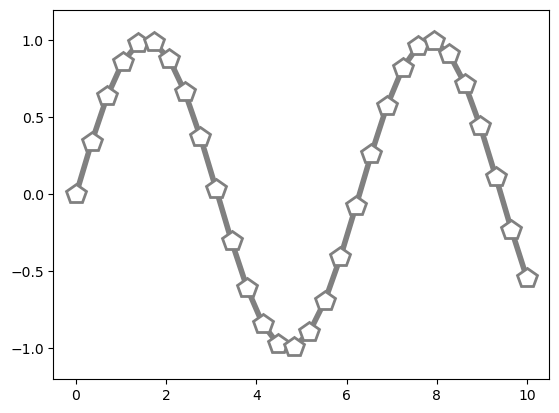

In [25]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)

## 2.2 Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

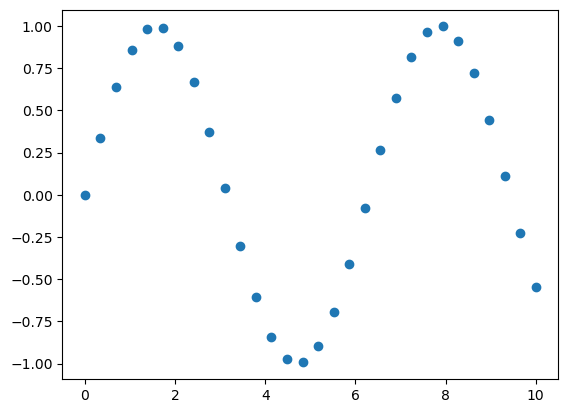

In [26]:
plt.scatter(x, y, marker='o')

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

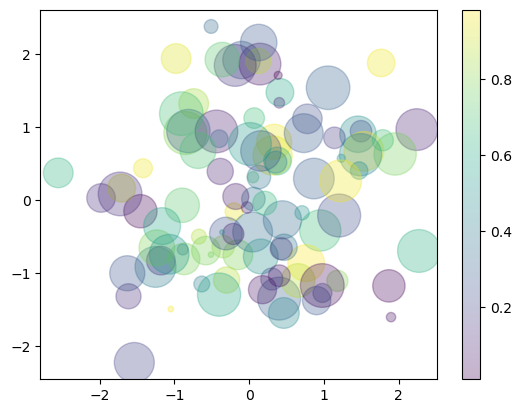

In [27]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

Text(0, 0.5, 'sepal width (cm)')

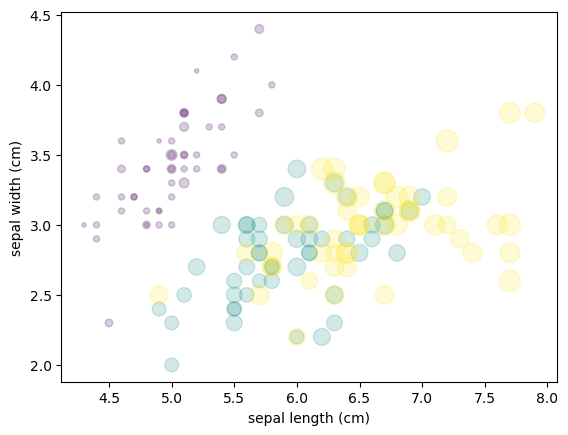

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# 3. Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.

In [29]:
data = np.random.randn(1000)

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

(array([ 1.,  1.,  3.,  4., 13.,  6., 13., 18., 22., 37., 51., 45., 58.,
        75., 68., 86., 70., 83., 82., 66., 58., 35., 33., 27., 17., 16.,
         4.,  3.,  1.,  4.]),
 array([-3.20584147, -3.00577813, -2.8057148 , -2.60565146, -2.40558813,
        -2.20552479, -2.00546146, -1.80539812, -1.60533479, -1.40527145,
        -1.20520812, -1.00514478, -0.80508145, -0.60501811, -0.40495478,
        -0.20489144, -0.0048281 ,  0.19523523,  0.39529857,  0.5953619 ,
         0.79542524,  0.99548857,  1.19555191,  1.39561524,  1.59567858,
         1.79574191,  1.99580525,  2.19586858,  2.39593192,  2.59599526,
         2.79605859]),
 [<matplotlib.patches.Polygon at 0x16f79a459a0>])

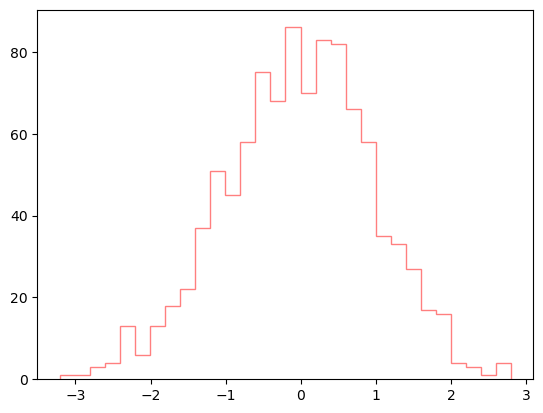

In [30]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='step', color='steelblue',
         edgecolor='red')

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

(array([ 1.,  0.,  1.,  1.,  0.,  1.,  4.,  4.,  4., 11., 13., 30., 36.,
        33., 48., 46., 64., 83., 65., 75., 54., 68., 70., 46., 63., 57.,
        33., 24., 20., 15., 12.,  5.,  4.,  6.,  1.,  1.,  0.,  0.,  0.,
         1.]),
 array([-4.58359470e+00, -4.20242089e+00, -3.82124708e+00, -3.44007326e+00,
        -3.05889945e+00, -2.67772564e+00, -2.29655183e+00, -1.91537802e+00,
        -1.53420420e+00, -1.15303039e+00, -7.71856578e-01, -3.90682766e-01,
        -9.50895326e-03,  3.71664859e-01,  7.52838672e-01,  1.13401248e+00,
         1.51518630e+00,  1.89636011e+00,  2.27753392e+00,  2.65870773e+00,
         3.03988155e+00,  3.42105536e+00,  3.80222917e+00,  4.18340298e+00,
         4.56457680e+00,  4.94575061e+00,  5.32692442e+00,  5.70809823e+00,
         6.08927205e+00,  6.47044586e+00,  6.85161967e+00,  7.23279348e+00,
         7.61396730e+00,  7.99514111e+00,  8.37631492e+00,  8.75748873e+00,
         9.13866254e+00,  9.51983636e+00,  9.90101017e+00,  1.02821840e+01,
      

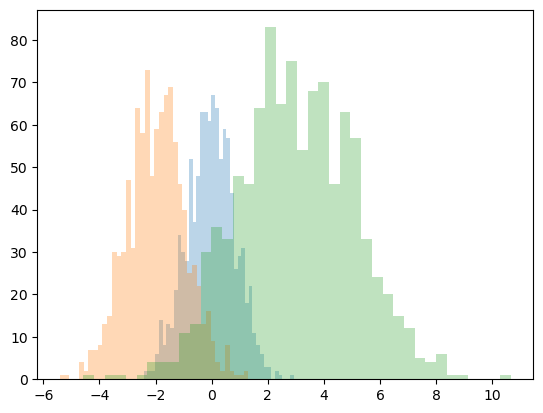

In [31]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

## kwargs are a dictionary of keyword arguments, which we pass to plt.hist
## to set the style of the histogram
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40)

# plt.hist(x1, **kwargs)
# plt.hist(x2, **kwargs)
# plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [32]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 28 186 440 301  45]


## 3.1 Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [33]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

## 3.2 ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

In [34]:
x

array([ 0.52524669, -0.20746366, -0.76880772, ...,  1.21094951,
        1.30118976, -0.51889895])

In [35]:
y

array([-0.50663586,  0.13233491, -0.0810899 , ...,  0.84317165,
        1.69616488, -1.35214717])

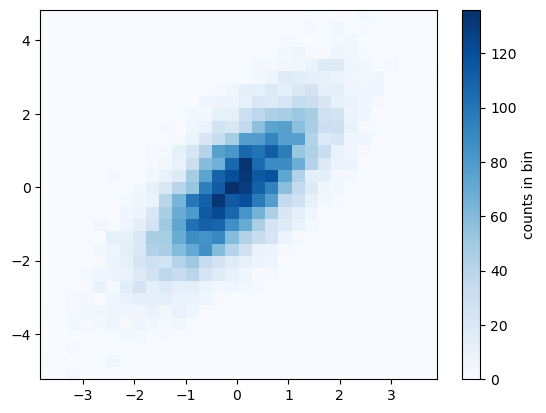

In [36]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

## 3.3 ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

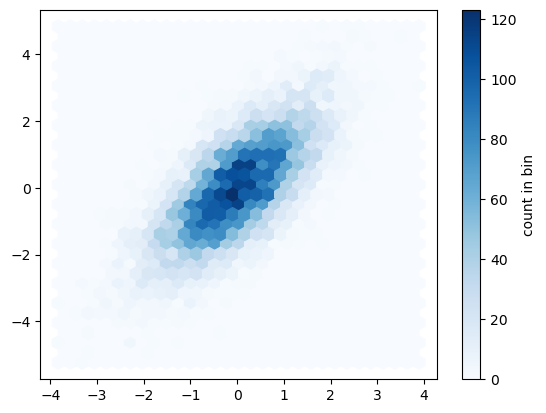

In [37]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

# 4. Multiple Subplots
Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this section we'll explore four routines for creating subplots in Matplotlib.

## 4.1 ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

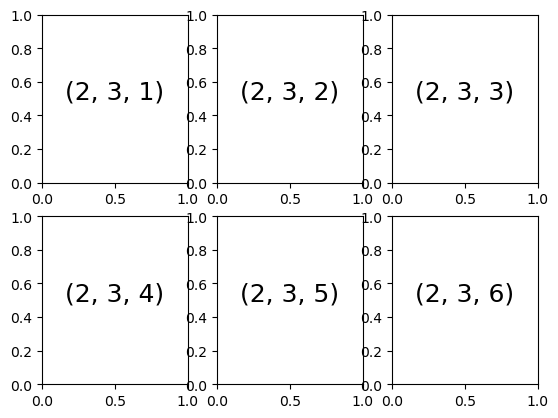

In [38]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

## 4.2 ``plt.subplots``: The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

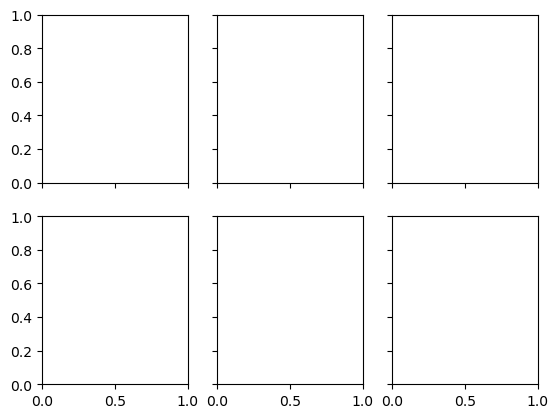

In [39]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

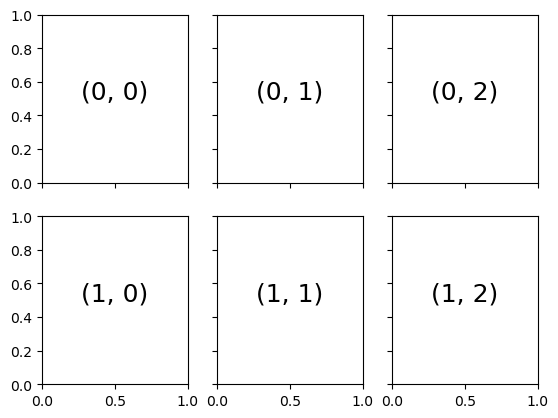

In [40]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

# 5. Visualization with Seaborn

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.


### 5.1 Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

(array([2338.,  785.,  315.,  305.,  251.,  210.,  187.,  149.,  128.,
         142.,  122.,  111.,  110.,   97.,   82.,  103.,   76.,  100.,
          84.,   81.,   68.,   85.,   81.,   78.,   99.,   91.,  103.,
          73.,   27.,   13.]),
 array([0.        , 0.03062974, 0.06125948, 0.09188922, 0.12251896,
        0.1531487 , 0.18377844, 0.21440818, 0.24503792, 0.27566766,
        0.3062974 , 0.33692713, 0.36755687, 0.39818661, 0.42881635,
        0.45944609, 0.49007583, 0.52070557, 0.55133531, 0.58196505,
        0.61259479, 0.64322453, 0.67385427, 0.70448401, 0.73511375,
        0.76574349, 0.79637323, 0.82700297, 0.85763271, 0.88826245,
        0.91889219]),
 <BarContainer object of 30 artists>)

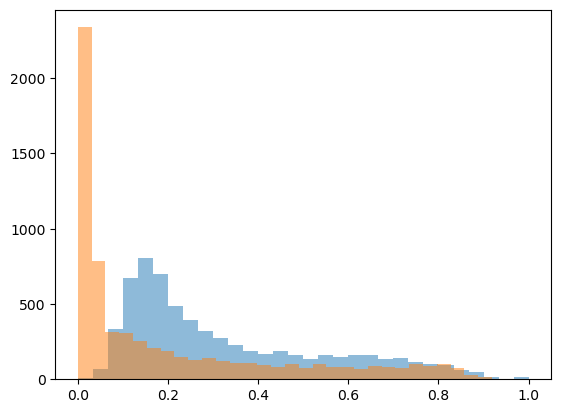

In [42]:
plt.hist(nyc_census['perc_other'], alpha=0.5,bins=30)
plt.hist(nyc_census['perc_black'], alpha=0.5,bins=30)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

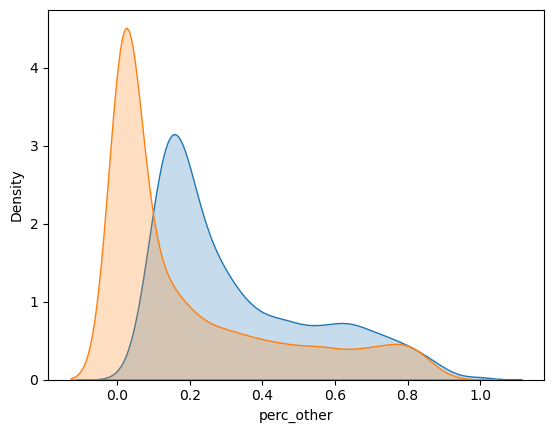

In [44]:
for col in ['perc_other','perc_black']:
    sns.kdeplot(nyc_census[col], fill=True)

Histograms and KDE can be combined using ``histplot``:

<Axes: xlabel='perc_other', ylabel='Count'>

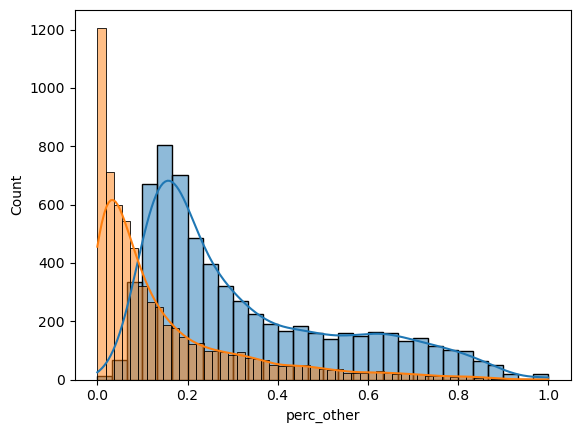

In [45]:
sns.histplot(nyc_census['perc_other'],kde=True)
sns.histplot(nyc_census['perc_asian'],kde=True)

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

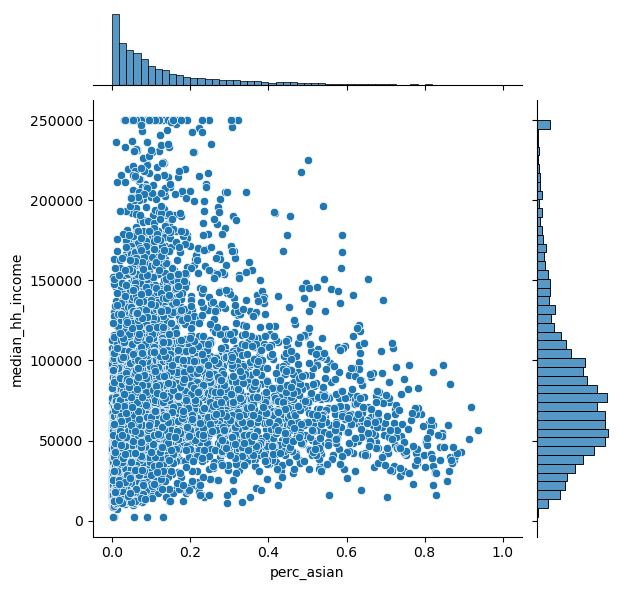

In [46]:
sns.jointplot(x="perc_asian", y="median_hh_income", data = nyc_census)

c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\desai\miniforge3\envs\

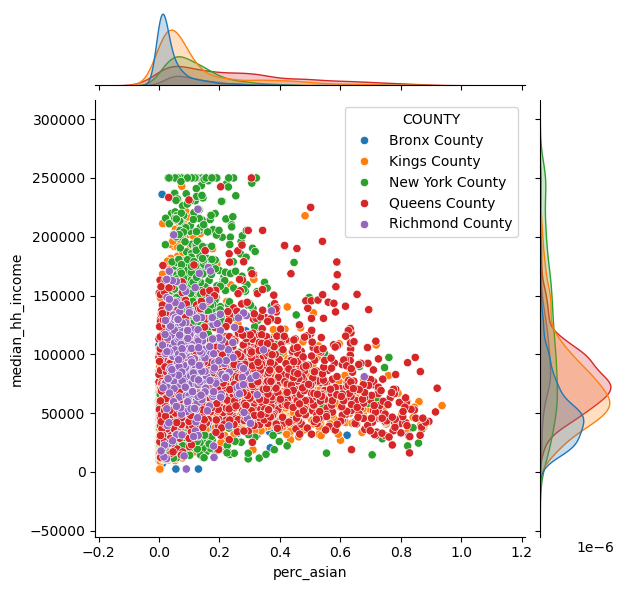

In [47]:
sns.jointplot(data=nyc_census, x="perc_asian", y="median_hh_income", hue="COUNTY")


## 5.2 Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\desai\miniforge3\envs\

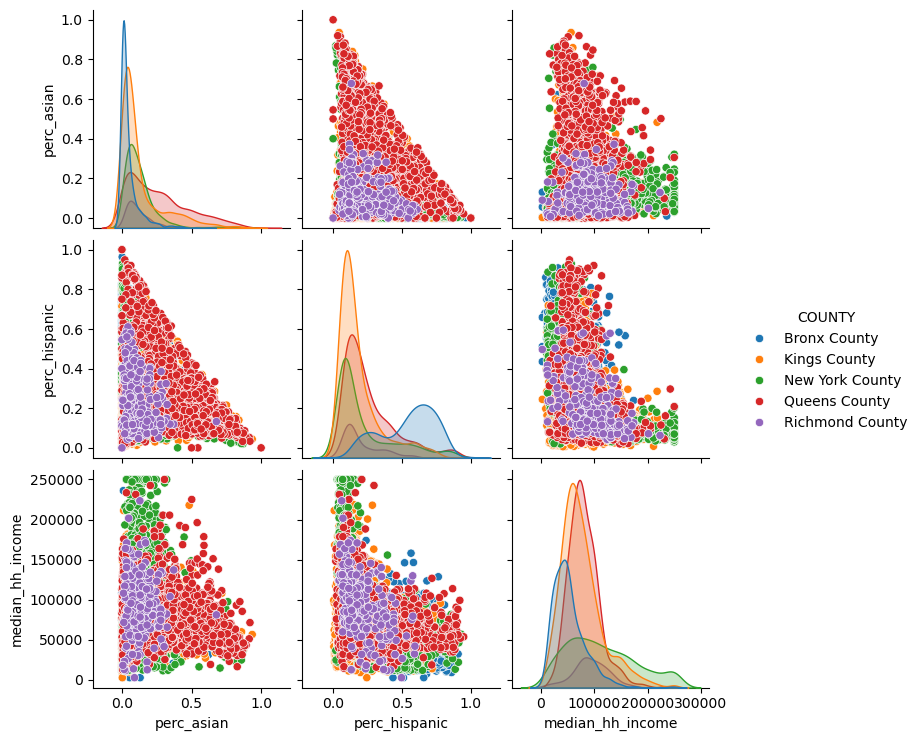

In [48]:
## This might take a while
sns.pairplot(nyc_census[[ 'COUNTY','perc_asian', 'perc_hispanic', 'median_hh_income']], hue='COUNTY', height=2.5)

## 5.3 Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.


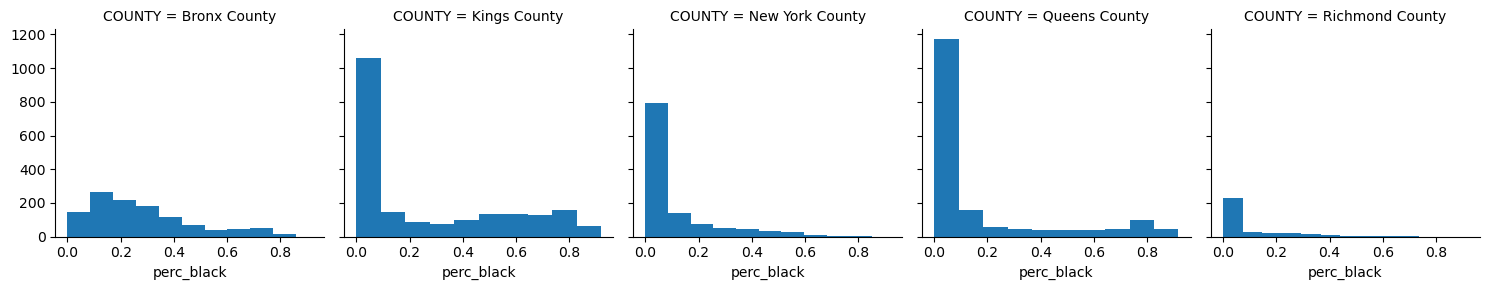

In [49]:
grid = sns.FacetGrid(nyc_census, col="COUNTY",  margin_titles=True)
grid.map(plt.hist, "perc_black")

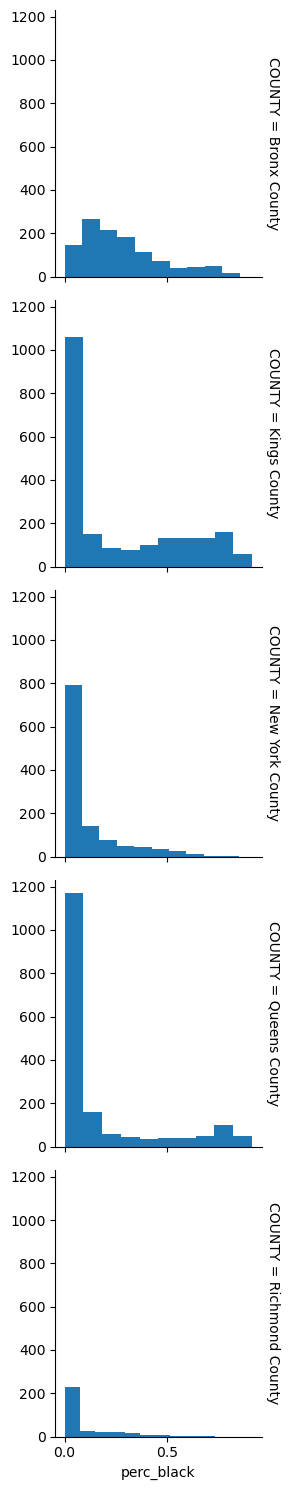

In [51]:
grid = sns.FacetGrid(nyc_census, row="COUNTY",  margin_titles=True)
grid.map(plt.hist, "perc_black")

## 5.4 Categorical plots

Categorical plots can be useful for this kind of visualization as well.

We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data.
d by any other parameter:

In [53]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


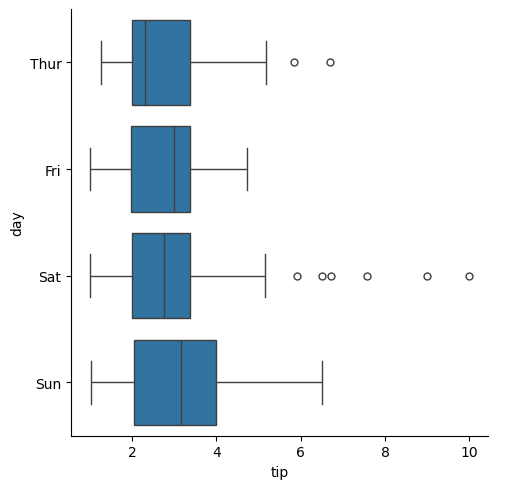

In [54]:
# sns.catplot(data=tips, x="sex", y="day")
sns.catplot(data=tips, x="tip", y="day", kind="box")

c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


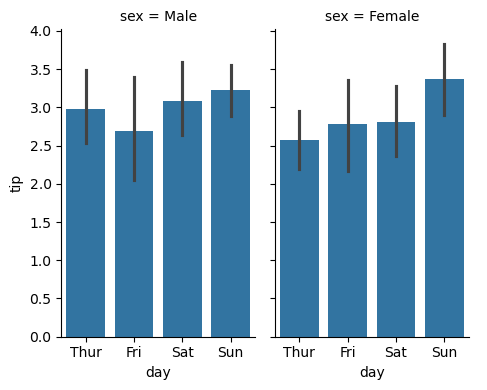

In [55]:
sns.catplot(
    data=tips, x="day", y="tip", col="sex",
    kind="bar", height=4, aspect=.6,
)

In [ ]:
#I didn't find a Q1 in this document.

In [57]:
nyc_census.columns

Index(['GISJOIN', 'total_pop', 'total_pop_hispanic', 'total_pop_white',
       'total_pop_black', 'total_pop_native', 'total_pop_asian',
       'total_pop_pacific', 'total_pop_other', 'median_hh_income', 'COUNTY',
       'geometry', 'perc_black', 'perc_white', 'perc_asian', 'perc_hispanic',
       'perc_native', 'perc_pacfic', 'perc_other'],
      dtype='object')

## Q.2 Scatterplot in seaborn
- Using the seaborn `sns.scatterplot(data=df,x='x_col',y='y_col',hue='color_by_col')` function, create a scatter plot of: 
    - x axis = % white
    - y axis = median household income
    - color this by the county


The documentation for the scatterplot function is [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

<Axes: xlabel='perc_white', ylabel='median_hh_income'>

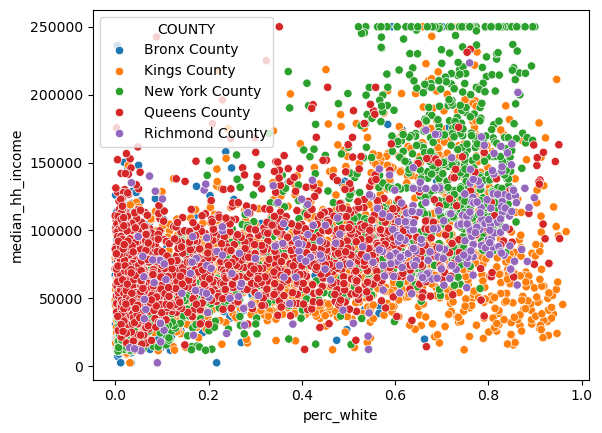

In [61]:
## insert your code here
sns.scatterplot(data=nyc_census, x="perc_white", y="median_hh_income", hue="COUNTY")

## Q.3 Scatter plot with regression
- Create the same scatter plot, but with a regression line using `sns.lmplot()`
- Instead of all counties in the same plot, out the counties into different columns (hint: `col` input in `sns.lmplot()`).

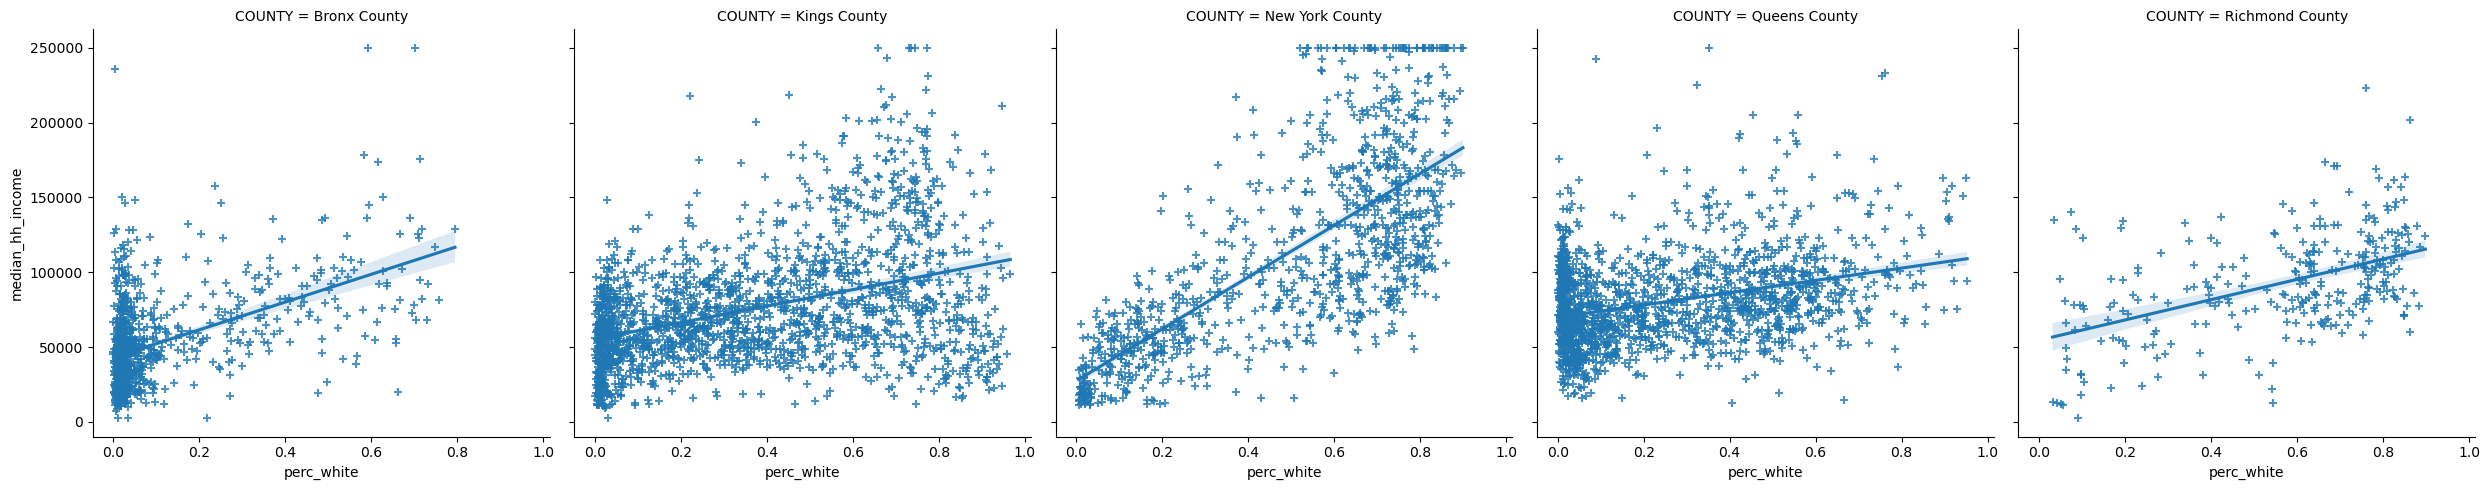

In [63]:
sns.lmplot(data= nyc_census, x="perc_white", y="median_hh_income", col="COUNTY",markers='+', )

## Q.4 
In general, what is the relationship between the % white in a block group and the median income? For which county is this relationship the most pronounced (steepest slope)? 

In general, the median income increases as the % white increases. This relationship is most pronounced in New York County.